# Feature Selection Techniques - Variance Inflation Factor (VIF)

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. 

The Variance Inflation Factor (VIF) technique from the Feature Selection Techniques collection is not intended to improve the quality of the model, but to remove the autocorrelation of independent variables.


Source of data: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

data source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
df = pd.read_csv ('/home/wojciech/Pulpit/6/Breast_Cancer_Wisconsin.csv')
green(df.shape)
df.head(3)


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


### Deleting unneeded columns

In [4]:
df['concave_points_worst'] = df['concave points_worst']
df['concave_points_se'] = df['concave points_se']
df['concave_points_mean'] = df['concave points_mean']

del df['Unnamed: 32']
del df['diagnosis']
del df['id']

In [5]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
concave_points_worst       0
concave_points_se          0
concave_points_mean        0
dtype: int64

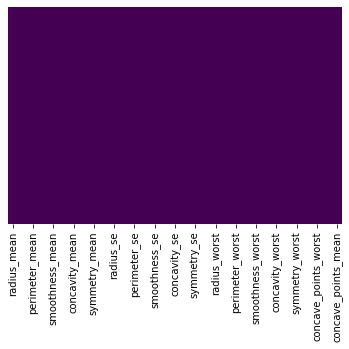

In [6]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Deletes duplicates
there were no duplicates

In [7]:
green(df.shape)
df.drop_duplicates(keep='first', inplace=True)
blue(df.shape)

(569, 33)
(569, 33)


In [8]:
blue(df.dtypes)

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [9]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'concave_points_worst',
       'concave_points_se', 'concave_points_mean'],
      dtype='object')

### We choose the continuous variable - compactness_mean


max: 0.3454
min: 0.01938


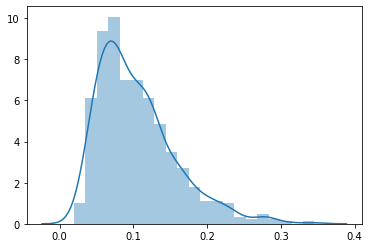

In [10]:
print('max:',df['compactness_mean'].max())
print('min:',df['compactness_mean'].min())

sns.distplot(np.array(df['compactness_mean']))

# Variance Inflation Factor (VIF)

In [11]:
import pandas as pd
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [12]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [13]:
df.columns
exogs =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [14]:
print('Jeżeli VIF wynosi więcej niż 5 prawdopodobnie występuje multicollinearity' )

pks = sklearn_vif(exogs, df)
pks.sort_values('VIF').round(1)
print()
blue('LinearRegression in sklearn')
blue(pks[pks['VIF']<=10])


kot = get_vif(exogs, df)
kot.sort_values('VIF').round(1)
print()
green('LinearRegression in statasmodels')
green(kot[kot['VIF']<=10])


Jeżeli VIF wynosi więcej niż 5 prawdopodobnie występuje multicollinearity

LinearRegression in sklearn
                           VIF  Tolerance
smoothness_mean       8.194282   0.122036
symmetry_mean         4.220656   0.236930
texture_se            4.205423   0.237788
smoothness_se         4.027923   0.248267
symmetry_se           5.175426   0.193221
fractal_dimension_se  9.717987   0.102902
symmetry_worst        9.520570   0.105036

LinearRegression in statasmodels
                           VIF  Tolerance
smoothness_mean       8.194282   0.122036
symmetry_mean         4.220656   0.236930
texture_se            4.205423   0.237788
smoothness_se         4.027923   0.248267
symmetry_se           5.175426   0.193221
fractal_dimension_se  9.717987   0.102902
symmetry_worst        9.520570   0.105036


### OLS linear regression model for variables before reduction

In [15]:
blue(df.shape)


(569, 33)


In [16]:
X1 = df.drop('compactness_mean', axis=1) 
y1 = df['compactness_mean']  

In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y1, sm.add_constant(X1))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())

R2: 0.980200


### OLS linear regression model for variables after reduction

In [22]:
df2 =df[['smoothness_mean','symmetry_mean','texture_se','smoothness_se', 'fractal_dimension_se','symmetry_worst','compactness_mean']]

In [23]:
X2 = df2.drop('compactness_mean', axis=1) 
y2 = df2['compactness_mean']  

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y2, sm.add_constant(X2))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
red('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.649990
The reduction of dimensions caused the deterioration of the models properties
